In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from scipy import stats


In [28]:
os.chdir("E:\Data_Set")

In [29]:
Data=pd.read_csv("Manhattan12.csv")

In [30]:
Data.head()

,Manhattan Rolling Sales File. All Sales From August 2012 - August 2013.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Sales File as of 08/30/2013 Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Neighborhood Name 09/06/13, Descriptive Data i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013


In [31]:
new_header = Data.iloc[3]  
Data = Data[4:] 
Data.columns = new_header 

Data.reset_index(drop=True, inplace=True)


In [32]:
Data.head()

3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013


In [33]:

Data.index.name = 'index'


In [34]:
Data.head()

3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
index,,,,,,,,,,,,,,,,,,,,,
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013


In [35]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27395 entries, 0 to 27394
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         27395 non-null  object
 1   NEIGHBORHOOD                    27395 non-null  object
 2   BUILDING CLASS CATEGORY         27395 non-null  object
 3   TAX CLASS AT PRESENT            27395 non-null  object
 4   BLOCK                           27395 non-null  object
 5   LOT                             27395 non-null  object
 6   EASE-MENT                       27395 non-null  object
 7   BUILDING CLASS AT PRESENT       27395 non-null  object
 8   ADDRESS                         27395 non-null  object
 9   APART
MENT
NUMBER               27395 non-null  object
 10  ZIP CODE                        27395 non-null  object
 11  RESIDENTIAL UNITS               27395 non-null  object
 12  COMMERCIAL UNITS                27395 non-null

In [36]:
print("Shape of the original dataset:", Data.shape)

Shape of the original dataset: (27395, 21)


In [37]:
Data.columns = Data.columns.str.strip().str.replace('\n', '')

In [38]:

categorical_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
                       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENTNUMBER', 'TAX CLASS AT TIME OF SALE',
                       'BUILDING CLASS AT TIME OF SALE']
numerical_columns = ['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
                     'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALEPRICE', 'SALE DATE']


In [39]:
Data.head()

3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENTNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALEPRICE,SALE DATE
index,,,,,,,,,,,,,,,,,,,,,
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013


In [40]:
for col in numerical_columns:
    if col != 'SALE DATE' and Data[col].dtype == 'O':  # Check if the column is of type 'object' (string)
        Data[col] = pd.to_numeric(Data[col].str.replace(',', '', regex=True).str.replace('$', '', regex=True), errors='coerce')


In [41]:

Data['SALE DATE'] = pd.to_datetime(Data['SALE DATE'], format='%d/%m/%Y')


In [42]:

for col in categorical_columns:
    Data[col] = Data[col].str.strip()
    Data[col] = Data[col].replace('', np.nan)

In [43]:

Data[numerical_columns] = Data[numerical_columns].replace(0, np.nan)


In [44]:

print("Summary of missing values:")
Data.isnull().sum()


Summary of missing values:


3
BOROUGH                               0
NEIGHBORHOOD                         17
BUILDING CLASS CATEGORY            3454
TAX CLASS AT PRESENT                143
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT           143
ADDRESS                               0
APARTMENTNUMBER                   14570
ZIP CODE                              1
RESIDENTIAL UNITS                 16372
COMMERCIAL UNITS                  23962
TOTAL UNITS                        9704
LAND SQUARE FEET                  22906
GROSS SQUARE FEET                 23069
YEAR BUILT                         6441
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALEPRICE                          7593
SALE DATE                             0
dtype: int64

In [45]:

print("Summary statistics:")
Data.describe()


Summary statistics:


3,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALEPRICE
count,27395.000000,27395.000000,27394.000000,11023.000000,3433.000000,17691.000000,4489.000000,4.326000e+03,20954.000000,1.980200e+04
mean,1109.666728,741.789086,10029.226217,4.390003,2.992426,3.545249,5893.466028,6.061620e+04,1953.080557,2.556609e+06
std,465.994469,819.422424,34.966983,23.260831,12.689861,19.482767,7884.729624,8.111694e+04,37.692641,1.916295e+07
min,7.000000,1.000000,10001.000000,1.000000,1.000000,1.000000,200.000000,2.530000e+02,1000.000000,1.000000e+00
25%,877.000000,37.000000,10016.000000,1.000000,1.000000,1.000000,2104.000000,6.198500e+03,1920.000000,3.676662e+05
50%,1047.000000,1007.000000,10019.000000,1.000000,2.000000,1.000000,5046.000000,2.337150e+04,1955.000000,7.400000e+05
75%,1411.000000,1233.000000,10027.000000,1.000000,2.000000,1.000000,7532.000000,1.128500e+05,1987.000000,1.627399e+06
max,2250.000000,9117.000000,10463.000000,1328.000000,604.000000,1349.000000,213650.000000,1.970736e+06,2013.000000,1.307965e+09


In [46]:

data = Data.drop(['BOROUGH', 'EASE-MENT', 'APARTMENTNUMBER'], axis=1)


In [47]:

data = data.drop_duplicates()

In [48]:

data = data.dropna()

In [49]:
data.head()

3,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALEPRICE,SALE DATE
index,,,,,,,,,,,,,,,,,,
24,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,385,1,C7,17 AVENUE B,10009.0,7.0,1.0,8.0,2093.0,5852.0,1997.0,2,C7,283.0,2013-04-18
26,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,397,33,C7,14 AVENUE B,10009.0,25.0,2.0,27.0,3574.0,18212.0,1925.0,2,C7,13185684.0,2013-01-31
30,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,398,53,C7,170 EAST 2ND STREET,10009.0,36.0,3.0,39.0,4452.0,17664.0,1900.0,2,C7,3810602.0,2012-10-26
31,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,56,C4,203 EAST 4TH STREET,10009.0,10.0,1.0,10.0,2404.0,6975.0,1900.0,2,C4,7333333.0,2013-04-09
32,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,57,C4,201 EAST 4TH STREET,10009.0,9.0,1.0,9.0,2404.0,6875.0,1900.0,2,C4,7333333.0,2013-04-09


In [50]:
numerical_columns = [col for col in numerical_columns if col != 'SALE DATE']
z_scores = np.abs(stats.zscore(data[numerical_columns]))

In [51]:
data = data[(z_scores < 3).all(axis=1)]


In [52]:
print("Shape of the cleaned and transformed dataset:", data.shape)

Shape of the cleaned and transformed dataset: (428, 18)


In [53]:
data['LOG SALE PRICE'] = np.log(data['SALEPRICE'])
data[numerical_columns] = (data[numerical_columns] - data[numerical_columns].mean()) / data[numerical_columns].std()


# Now I have a cleaned and transformed dataset ready for analysis and modeling

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 26 to 27064
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NEIGHBORHOOD                    428 non-null    object        
 1   BUILDING CLASS CATEGORY         428 non-null    object        
 2   TAX CLASS AT PRESENT            428 non-null    object        
 3   BLOCK                           428 non-null    float64       
 4   LOT                             428 non-null    float64       
 5   BUILDING CLASS AT PRESENT       428 non-null    object        
 6   ADDRESS                         428 non-null    object        
 7   ZIP CODE                        428 non-null    float64       
 8   RESIDENTIAL UNITS               428 non-null    float64       
 9   COMMERCIAL UNITS                428 non-null    float64       
 10  TOTAL UNITS                     428 non-null    float64       
 11  LAN

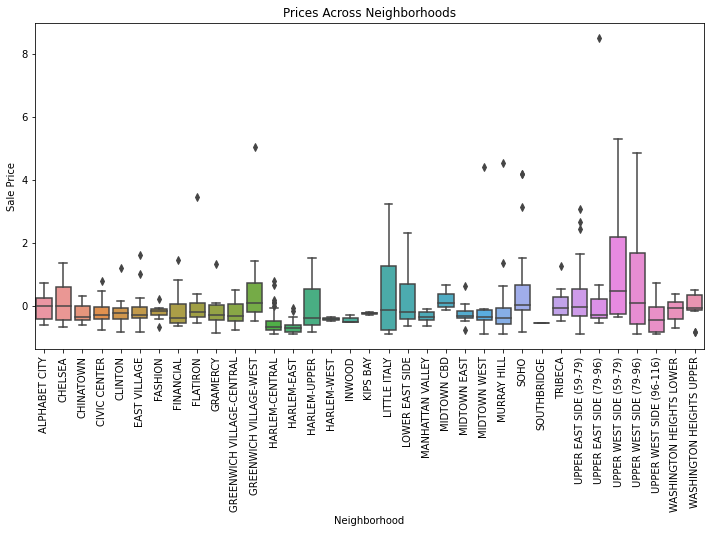

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='NEIGHBORHOOD', y='SALEPRICE', data=data)
plt.xticks(rotation=90)
plt.title('Prices Across Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.show()


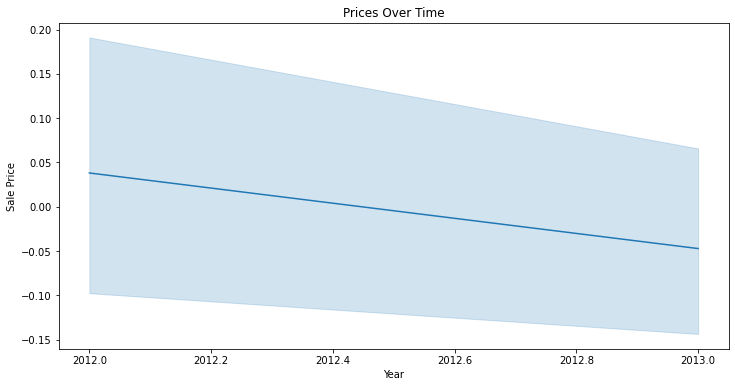

In [56]:
data['YEAR'] = data['SALE DATE'].dt.year
plt.figure(figsize=(12, 6))
sns.lineplot(x='YEAR', y='SALEPRICE', data=data)
plt.title('Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Sale Price')
plt.show()

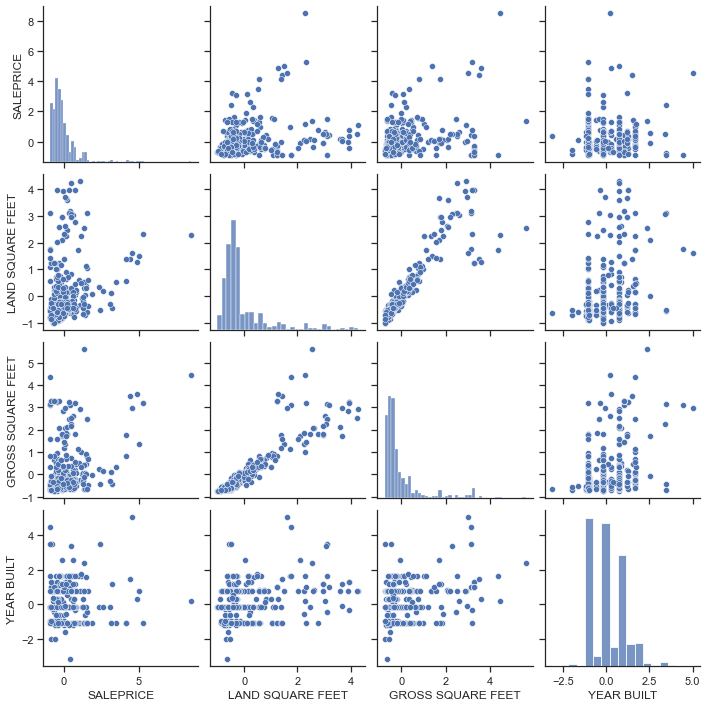

In [57]:
sns.set(style='ticks')
sns.pairplot(data, vars=['SALEPRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT'])
plt.show()

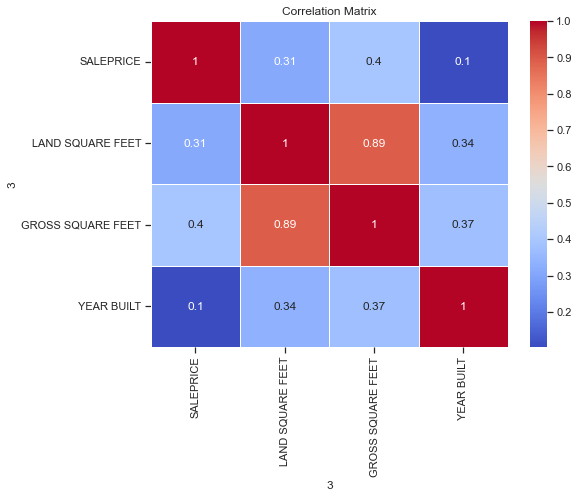

In [58]:
correlation_matrix = data[['SALEPRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


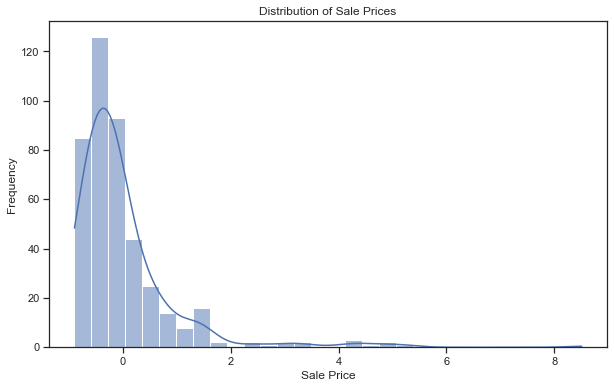

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(data['SALEPRICE'], bins=30, kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


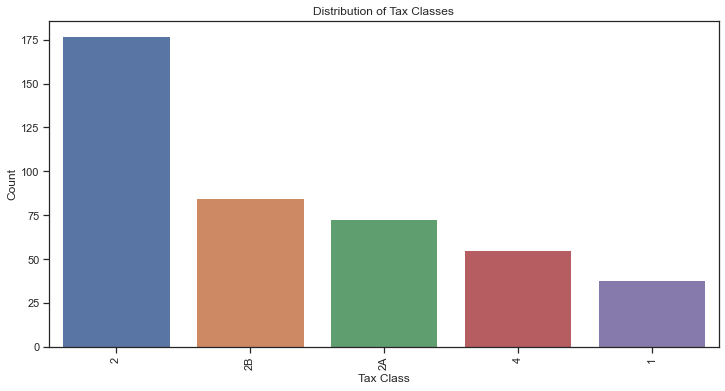

In [60]:
plt.figure(figsize=(12, 6))
sns.countplot(x='TAX CLASS AT PRESENT', data=data)
plt.title('Distribution of Tax Classes')
plt.xlabel('Tax Class')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()




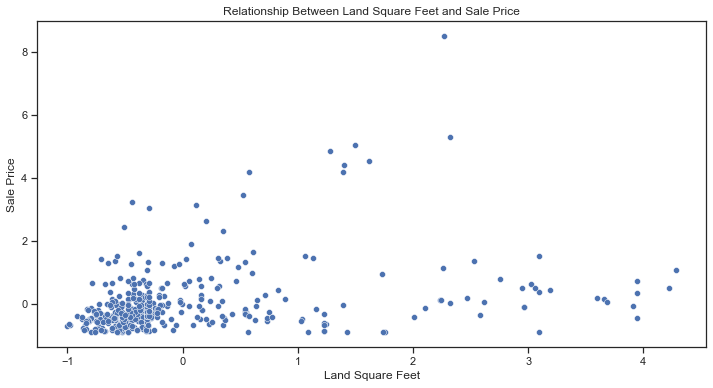

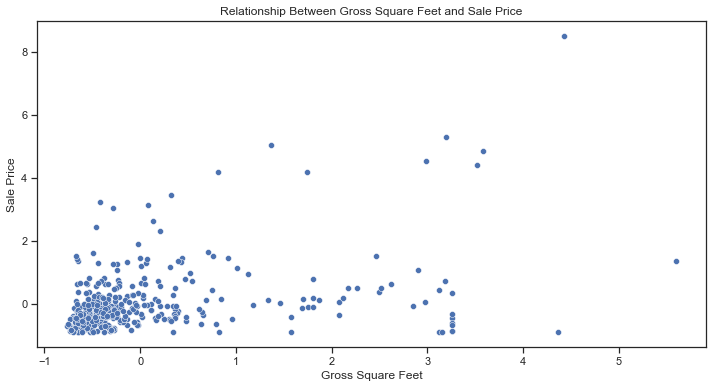

In [61]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='LAND SQUARE FEET', y='SALEPRICE', data=data)
plt.title('Relationship Between Land Square Feet and Sale Price')
plt.xlabel('Land Square Feet')
plt.ylabel('Sale Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='GROSS SQUARE FEET', y='SALEPRICE', data=data)
plt.title('Relationship Between Gross Square Feet and Sale Price')
plt.xlabel('Gross Square Feet')
plt.ylabel('Sale Price')
plt.show()


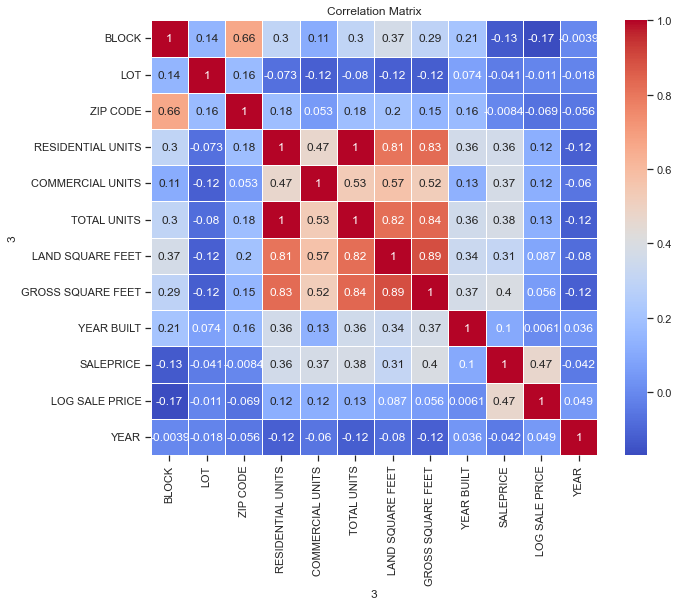

In [62]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Model building


In [63]:
predictors = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS']
X = data[predictors]
y = data['SALEPRICE']


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [66]:
y_pred = model.predict(X_test)


In [67]:
residuals = y_test - y_pred


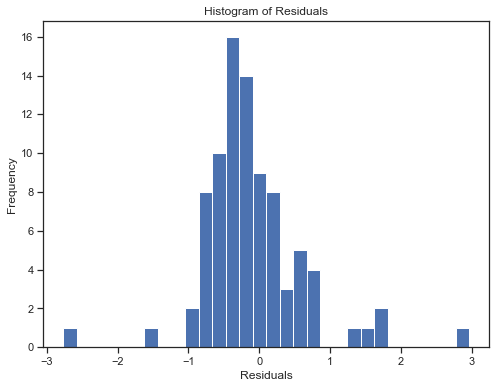

In [68]:

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [69]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)

In [70]:
print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))


Cross-Validation RMSE Scores: [0.49846423 0.79066494 0.80619783 0.99945751 1.24397996]
Mean RMSE: 0.8677528926018361


In [71]:
coefficients = model.named_steps['linearregression'].coef_
intercept = model.named_steps['linearregression'].intercept_


In [72]:
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [-0.47460383  0.60948399 -0.05243642  0.15375713  0.30999916]
Intercept: 0.028179944445685466


# Improved model

In [73]:
predictors = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS']
X = data[predictors]
y = data['SALEPRICE']

In [74]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [76]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [77]:
y_pred = model.predict(X_test)

In [78]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE of Improved Model:", rmse)


RMSE of Improved Model: 0.8354211874372199


# K-Means Clustering

In [79]:
kmeans = KMeans(n_clusters=3, random_state=42) 
clusters = kmeans.fit_predict(X_imputed)


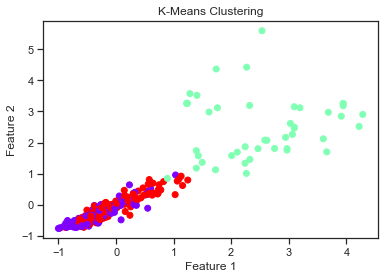

In [80]:
plt.scatter(X_imputed[:, 0], X_imputed[:, 1], c=clusters, cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Clusters-Based Regression

In [81]:
cluster_regressors = []
y_pred_clusters = np.zeros_like(y_test)

for i, cluster_regressor in enumerate(cluster_regressors):
    mask = clusters == i
    if len(mask) > 0:
        X_test_cluster = X_test[mask]  
        y_pred_clusters[mask] = cluster_regressor.predict(X_test_cluster)


r2 = r2_score(y_test, y_pred_clusters)
print("R-squared of Cluster-Based Regression:", r2)


R-squared of Cluster-Based Regression: -0.027021498769553842
